# Oblique tree behavior comparison
In addtion to other algorithms (SVM, MLP, RF) and human, the oblique tree (RERF) is added to the list for comparison.

In [1]:
# changing cwd
%cd ..

/home/jshinm/Desktop/workstation/inductive-bias


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ /home/jshinm/Desktop/workstation/inductive-bias/clf/SimulationData.pickle ] loaded
[ /home/jshinm/Desktop/workstation/inductive-bias/clf/PosteriorData.pickle ] loaded
[ /home/jshinm/Desktop/workstation/inductive-bias/clf/TrainedCLF.pickle ] loaded
[ /home/jshinm/Desktop/workstation/inductive-bias/clf/EstimatedData.pickle ] loaded
[ /home/jshinm/Desktop/workstation/inductive-bias/clf/HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


In [3]:
ib.load_sampledData()

[ /home/jshinm/Desktop/workstation/inductive-bias/clf/SampledData.pickle ] loaded


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-09-21 01:06:11.076856


## Load Dependencies

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
# import pickle
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1 import AxesGrid

cmap = 'PRGn'

# for figure 3
import matplotlib as mpl
from matplotlib.lines import Line2D #only for the purpose of creating the legend

import warnings
warnings.filterwarnings('ignore')

import rerf

In [6]:
rerf.check_version()

'2.0.5'

In [7]:
from rerf.rerfClassifier import rerfClassifier

In [8]:
ib.clf[1][2][2].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
clf = rerfClassifier(
    projection_matrix='RerF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10
) #SPORF specification

clf = rerfClassifier(
    projection_matrix='MT-MORF',
    n_jobs=-1,
    n_estimators=128,
    max_features='auto',
    max_depth=10,
    patch_height_max=100,
    patch_height_min=10,
    patch_width_max=100,
    patch_width_min=10
) #MORF specification

In [27]:
clf.get_params()

{'feature_combinations': 1.5,
 'image_height': None,
 'image_width': None,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 1,
 'n_estimators': 128,
 'n_jobs': -1,
 'oob_score': False,
 'patch_height_max': 100,
 'patch_height_min': 10,
 'patch_width_max': 100,
 'patch_width_min': 10,
 'projection_matrix': 'MT-MORF',
 'random_state': None}

In [29]:
clf.fit(ib.Ctrain_X[2], ib.Ctrain_y[2])

TypeError: unsupported operand type(s) for %: 'int' and 'NoneType'

In [ ]:
ib.mask = ib.generate_mask(h=0.1)

In [ ]:
y_pred = clf.predict_proba(ib.mask[:,:])

In [ ]:
len(y_pred)

3600

ValueError: 'c' argument has 7200 elements, which is inconsistent with 'x' and 'y' with size 3600.

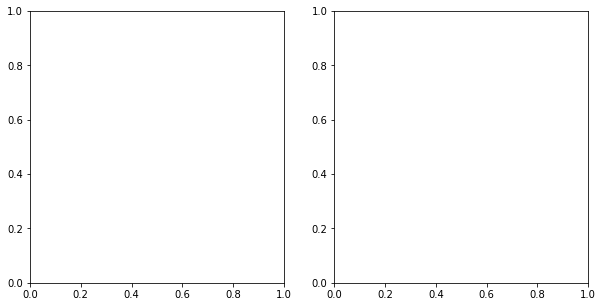

In [ ]:
# y_pred
fig, ax = plt.subplots(1,2,figsize=(5*2,5))

ax[0].scatter(ib.mask[:,0],ib.mask[:,1], c=y_pred, cmap='PRGn_r')
ax[1].scatter(ib.estpst_sample[0][2][:,0],ib.estpst_sample[0][2][:,1], c=ib.estpst_sample[0][2][:,2], cmap='PRGn_r')

In [ ]:
ib.estpst_sample[0][3]

array([[-2.59      ,  0.74      ,  0.49889602],
       [ 0.56      ,  1.55      ,  0.86335115],
       [-2.05      , -0.7       ,  0.19959978],
       ...,
       [-1.6       , -1.15      ,  0.39863727],
       [ 2.81      , -2.14      ,  0.10185205],
       [ 1.28      , -0.43      ,  0.35162615]])

In [ ]:
ib.mask

array([[-3. , -3. ],
       [-2.9, -3. ],
       [-2.8, -3. ],
       ...,
       [ 2.7,  2.9],
       [ 2.8,  2.9],
       [ 2.9,  2.9]])